In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df=pd.read_csv("/content/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [23]:
df.shape

(344, 7)

**3.1 UNIVARIATE ANALYSIS**

<ipython-input-24-6b0f9091ec0f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['flipper_length_mm'])


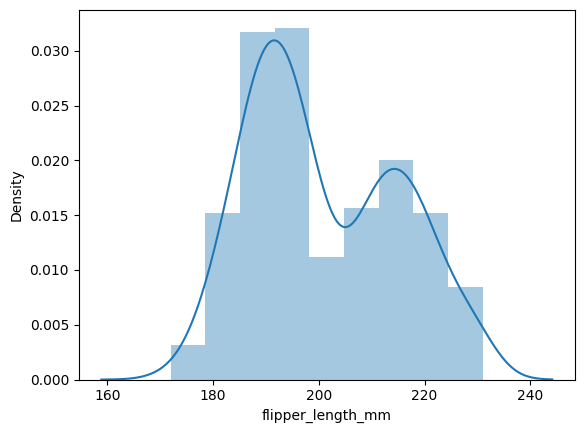

In [24]:
#Univaraite
sns.distplot(df['flipper_length_mm'])
plt.show()

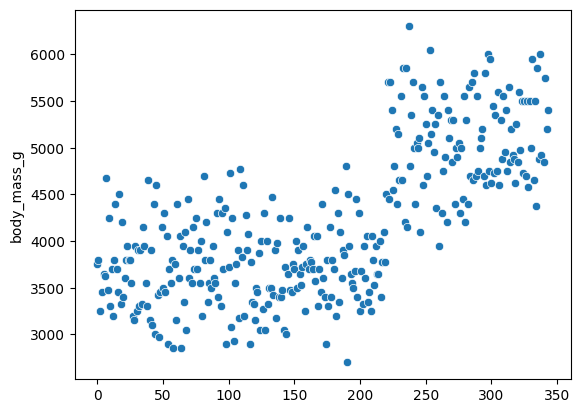

In [25]:
sns.scatterplot(df['body_mass_g'])
plt.show()

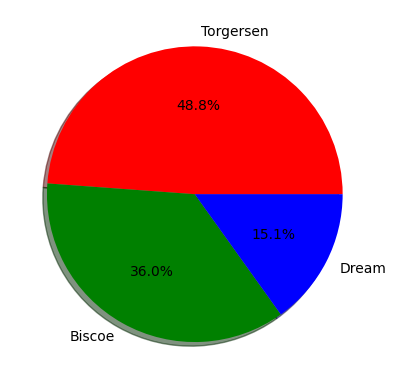

In [26]:
count = df['island'].value_counts()
plt.pie(count,labels=df['island'].unique(),autopct="%1.1f%%",shadow=True,colors=['red','green','blue'])
plt.show()

**3.2 BI VARIATE ANALYSIS**

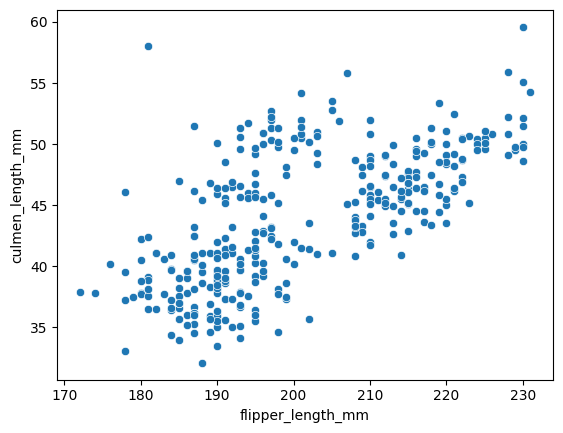

In [27]:
sns.scatterplot(x=df['flipper_length_mm'],y=df['culmen_length_mm'])
plt.show()

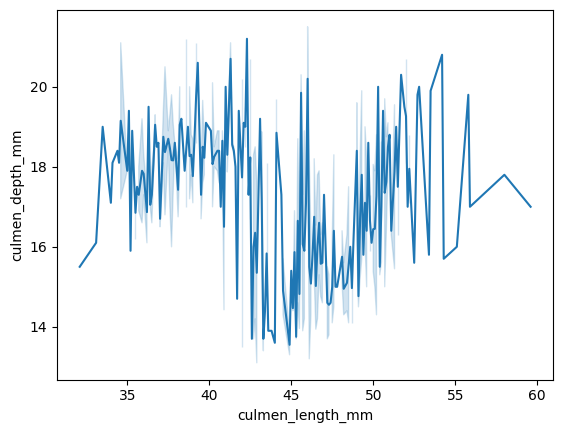

In [28]:
sns.lineplot(x=df['culmen_length_mm'],y=df['culmen_depth_mm'])
plt.show()

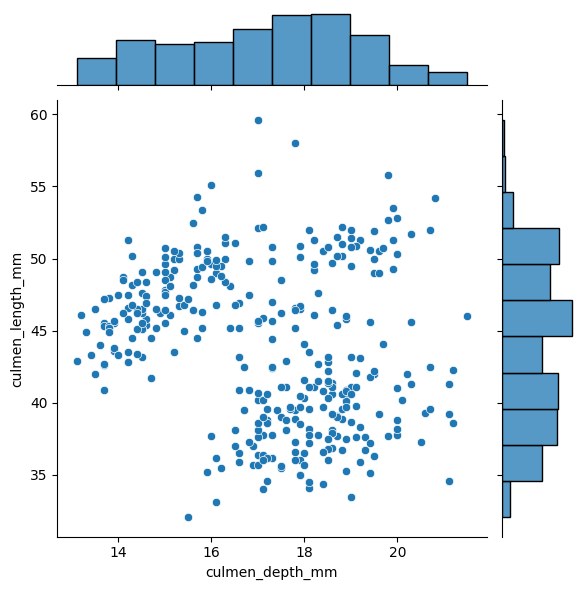

In [29]:
sns.jointplot(x=df['culmen_depth_mm'],y=df['culmen_length_mm'])

**3.3 MULTIVARIATE ANALYSIS**

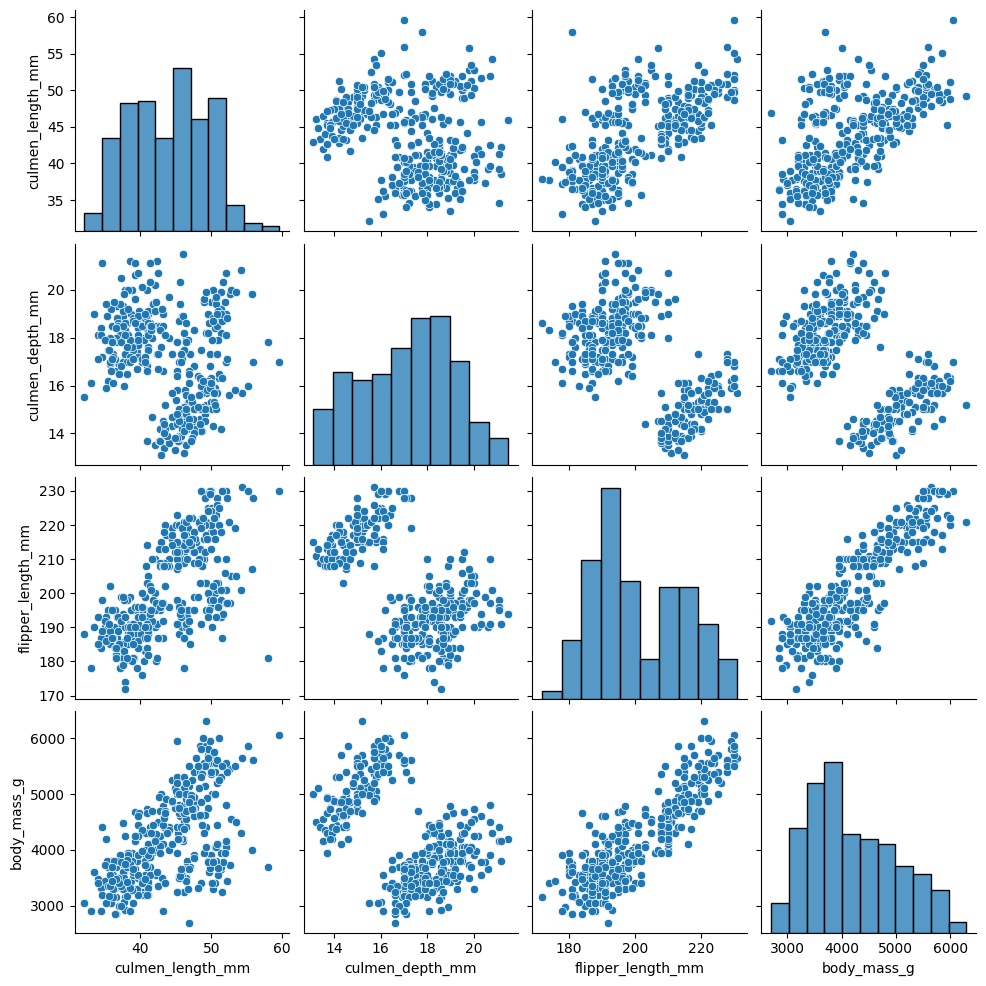

In [30]:
sns.pairplot(df)

**4 DESCRIPTIVE STATISTICS**

In [31]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


**5. Check and deal with missing values**

In [32]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [33]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [34]:
#Nan values replaced with median for non categorical columns
df['sex'].fillna("MALE",inplace=True)
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace=True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(), inplace = True )
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(), inplace = True )
df['body_mass_g'].fillna(df['body_mass_g'].median(), inplace = True )

In [35]:
df.isnull().any()

species              False
island               False
culmen_length_mm     False
culmen_depth_mm      False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [36]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

**6. Find the outliers and replace the outliers**

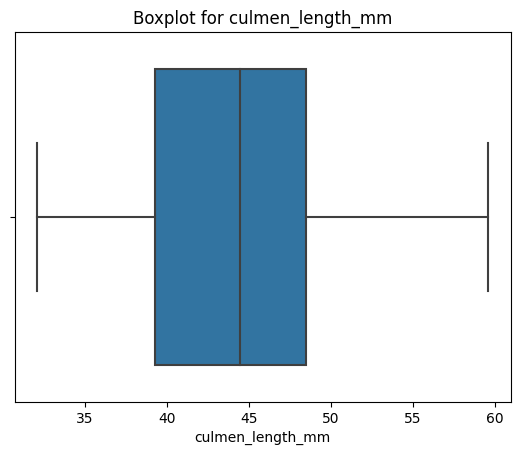

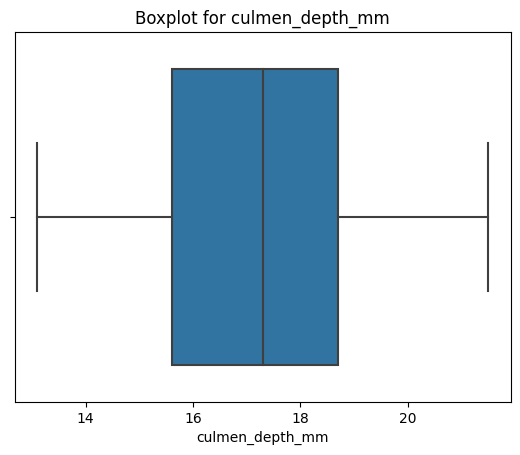

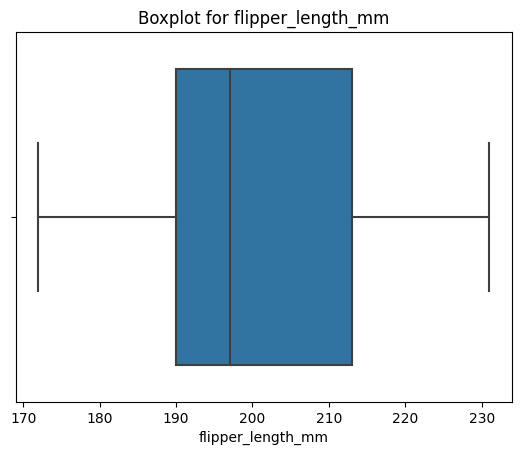

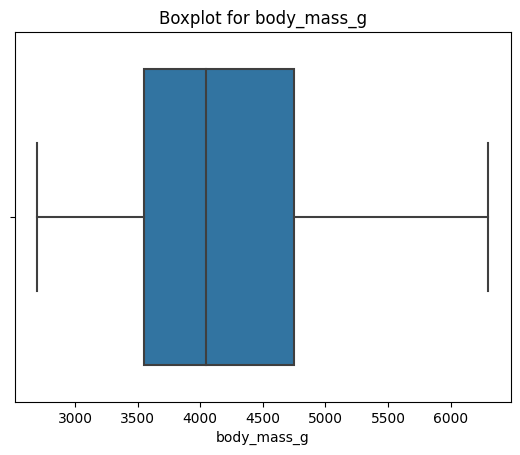

In [37]:
nc_columns = df.select_dtypes(exclude=['object'])
for i in nc_columns.columns:
    sns.boxplot(data=df,x=i)
    plt.title(f'Boxplot for {i}')
    plt.show()

***7. Check the correlation of independent variables with the target***

<Axes: >

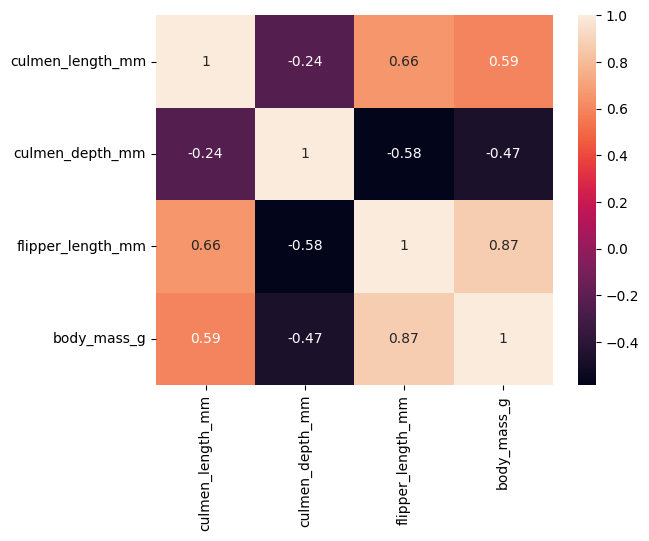

In [38]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [45]:
n_corr = df.corr(numeric_only=True)
n_corr['species']

KeyError: ignored

***8. Checking Categorical columns and perform encoding***

In [47]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['sex']=le.fit_transform(df['sex'])
df['island']=le.fit_transform(df['island'])
df['species']=le.fit_transform(df['species'])

***9. Split the data into dependent and independent variables.***

In [54]:
df_species=df['species']
df_species.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [53]:
df_nospecies=df.drop(columns='species',axis=1)
df_nospecies.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10,18.7,181.0,3750.0,2
1,2,39.50,17.4,186.0,3800.0,1
2,2,40.30,18.0,195.0,3250.0,1
3,2,44.45,17.3,197.0,4050.0,2
4,2,36.70,19.3,193.0,3450.0,1


***10. Data scaling***

In [56]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_sc=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x_sc.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.449091,0.500000,0.423729,0.375000,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


***11. Split the data into training and testing***

In [57]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_sc,df_species,test_size=0.2,random_state=0)

***12. Training and testing data shape***

In [58]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(275, 6)
(275,)
(69, 6)
(69,)
